In [1]:
# step 1.Import dependencies

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy.stats import skew
# from utility import check_missing_values

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
df=pd.read_csv("data\Advertising.csv",index_col=0)

In [3]:
df.head(10)

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
6,8.7,48.9,75.0,7.2
7,57.5,32.8,23.5,11.8
8,120.2,19.6,11.6,13.2
9,8.6,2.1,1.0,4.8
10,199.8,2.6,21.2,10.6


# step 3

In [7]:
print(df.dtypes)
print(df.shape)
print(df.info)
print(df.describe())

TV           float64
radio        float64
newspaper    float64
sales        float64
dtype: object
(200, 4)
<bound method DataFrame.info of         TV  radio  newspaper  sales
1    230.1   37.8       69.2   22.1
2     44.5   39.3       45.1   10.4
3     17.2   45.9       69.3    9.3
4    151.5   41.3       58.5   18.5
5    180.8   10.8       58.4   12.9
..     ...    ...        ...    ...
196   38.2    3.7       13.8    7.6
197   94.2    4.9        8.1    9.7
198  177.0    9.3        6.4   12.8
199  283.6   42.0       66.2   25.5
200  232.1    8.6        8.7   13.4

[200 rows x 4 columns]>
               TV       radio   newspaper       sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   14.022500
std     85.854236   14.846809   21.778621    5.217457
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   10.375000
50%    149.750000   22.900000   25.750000   12.900000
75%    218.825000   36.525

# step 4

<AxesSubplot:>

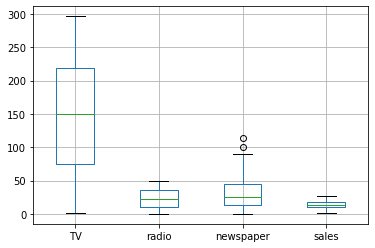

In [8]:
df.boxplot(grid=True) # we only use boxplot for continuous numeric data


- in data frame we have all the variables in continuous numeric values so we create box plot on all columns by this plot so we can see there is no outlier in tv,radio,sales but there are outliers in newspaper


##Note: If outlier present then we can treat using below approach
1.Elimination 
  1.Directly dropping the variable
2. Treat the outlier
  1.Using caping and flooring approach
  2.Replace using measures of central tendecies
  3.replace custom values
3.If cluster is present then leave them as it is
4.check with client if this is acceptable range or not

In [9]:
def check_missing_value(data):
    """
    objective: check missing value count and percentage in all columns
    data:input data frame
    return:Missing value data frame
    """
    total=data.isnull().sum().sort_values(ascending=False)
    percent=(data.isnull().sum()/data.isnull().count()*100).sort_values(ascending=False)
    missing_data=pd.concat([total,percent],axis=1,keys=["total","percent"])
    return missing_data

In [10]:
miss=check_missing_value(df)
miss

,total,percent
sales,0,0.0
newspaper,0,0.0
radio,0,0.0
TV,0,0.0


# assumption 1

<AxesSubplot:>

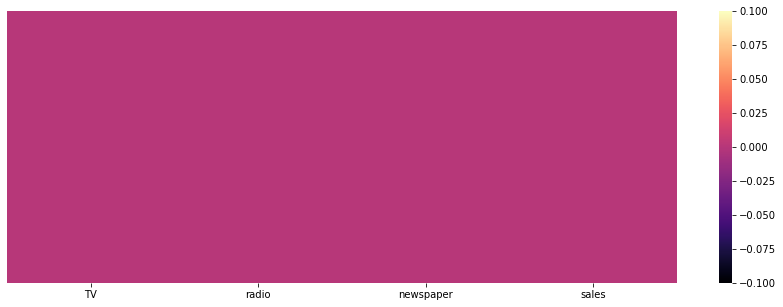

In [11]:
plt.figure(figsize=(15,5))
sns.heatmap(df.isnull(),cbar=True,yticklabels=False,cmap="magma")

Note:

1. If Missing value contain more than 50% of the data then you can drop the entire column
2. if less than 50% then we can treat those missing values by using Measure of Central tendencies
3. If column is Categorial then you can use Mode to replace missing values 
4. If column is Continuous Numerical Variable then you can you use mean if that variable is set
5. if column is continuous numerical variable with skewd data then we can use Median which is not affected by outlier
6. You can Predict the missing values by using Other features (not recommended)
7. You can directly ask to client
8. Common Sense


# assumption 2

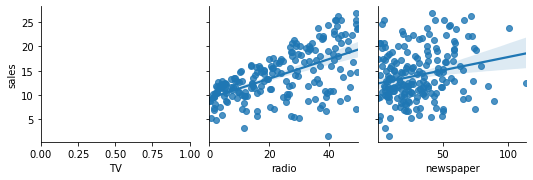

In [12]:
sns.pairplot(df,x_vars=["TV","radio","newspaper"],
                y_vars="sales",kind='reg')
plt.show()

Note: If the assumption of Linearity is not met then we can drop that variable

- Strong Positive Linear Relationship in Tv and sales
- Moderately Strong Positive Linear Relationship in Radio and sales .
- NO Relation in Newspaper Sales also the C.I is also high

In [13]:
feature_cols=['TV','radio','newspaper']
X=df[feature_cols]
y=df.sales

In [14]:
X.head()

,TV,radio,newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


In [15]:
y

1      22.1
2      10.4
3       9.3
4      18.5
5      12.9
       ... 
196     7.6
197     9.7
198    12.8
199    25.5
200    13.4
Name: sales, Length: 200, dtype: float64

# assumption 3: Assumption of normality: The dependent variable should follow an approximate normal distribution

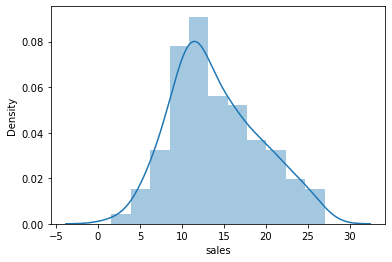

In [16]:
sns.distplot(y,hist=True)
plt.show()

- sale variable is meeting the assumptions and we can see the approximate normal distribution

# NOte: if its not normal or if its skewed plot than we can transform the column in different transformation
1. Log transform
  - most of the time we prefer log transform,because it will help you to smoothing of curve
2. SQRT Transform 
  - in sqrt transform we can see the peeks and sometime it will not help you to smoothening of curve

####  you can use this code to convert into log transformation
Y_log=np.log(y)
sns.distplot(Y_log,hist=True)
#### Note: If your data is approximate normal than dont transform because you will get transform data

# Note: For good practice make sure that your X variables does not contain high skewness and its approximate normal then its good 

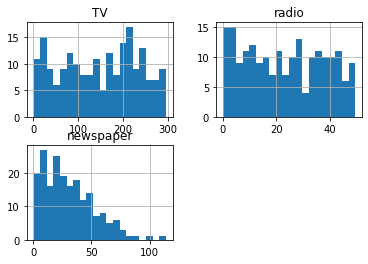

In [17]:
# check hist for all variables
X.hist(bins=20)
plt.show()

In [18]:
data_num_skew=X.apply(lambda x: skew(x.dropna()))
data_num_skewed=data_num_skew[(data_num_skew>0.75)|(data_num_skew<-0.75)]
print(data_num_skew)
print(data_num_skewed)

TV          -0.069328
radio        0.093467
newspaper    0.887996
dtype: float64
newspaper    0.887996
dtype: float64


In [19]:
# apply log features for all numerix features with skewness over 0.75
X[data_num_skewed.index]=np.log1p(X[data_num_skewed.index])

- Range of skewness is -1 to +1 and values close to 0 means normal distribution

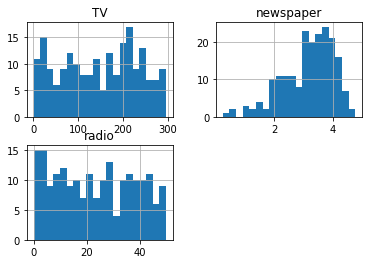

In [27]:
# check hist for all variables after lof transform of newspaper
X.hist(bins=20)
plt.show()

"""" Note: Types of models
Log - Transform
Level-Original
X     Y
Log   -  Log
Log   -  Level
Level -  Log
Level -  Level """

# Assumption 4: ThEre should be no multicolinearity in the data

Multicolinearity is problem where one variable is dependent on other, we want dependecy between x and y variable but not in the X variables so if X
variables are depend on each other then the model will not be good.

To check the multicolinearity we can use the pearson correlation or VIF value

# Pearson Correlation

In [29]:
corr_df=X.corr(method="pearson")
print(corr_df)

                 TV     radio  newspaper
TV         1.000000  0.054809   0.030951
radio      0.054809  1.000000   0.251909
newspaper  0.030951  0.251909   1.000000


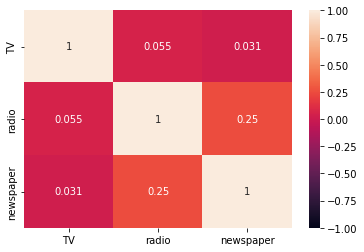

In [30]:
sns.heatmap(corr_df, vmax=1.0, vmin=-1.0, annot=True) 
plt.show()

#### We want value close to 0 means that is not correlated with each other

## Note: If the correlation is high between two variables then drop one because both variable carrying the similar information so eliminate the variables but think logically

# check vif(to check multicolinearity)

In [31]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
vif_df=pd.DataFrame()
vif_df["features"]=X.columns
vif_df["VIF Factor"]=[vif(X.values,i) for i in range(X.shape[1])]
vif_df.round(2)

,features,VIF Factor
0,TV,3.39
1,radio,3.63
2,newspaper,5.44


#### less than five is good

### Note: Once you eliminate one variable based on VIF score then other variable's VIF also change and it will decrease so never eliminate all valu so Remove Variables with Highest value and then Run the function again. Also use domain Knowledge Don't just depend on VIF Values


In [32]:
from sklearn.model_selection import train_test_split
# >1000 --> test size =0.3
# <1000 --> test size =0.3

# split the data inot test and train
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)

In [33]:
##Rerun the VIF CODE

from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()

scaler.fit(X_train)

X_train_scale=scaler.transform(X_train)
X_test_scale=scaler.transform(X_test)

X_train_scale
X_test_scale

array([[ 0.80575711,  0.50667623, -0.89144395],
       [-1.67640209,  1.85065419,  1.35278015],
       [ 0.90037407,  0.38197724,  0.97731565],
       [ 1.70154624,  1.37264141,  1.21459548],
       [ 0.87579823,  1.35185824,  0.64875833],
       [ 0.02670318,  0.11872383, -0.14069737],
       [ 0.53173656, -0.28308402,  0.17393068],
       [ 0.66075969,  1.8852928 ,  1.10589906],
       [ 0.8807134 ,  1.50426812,  0.23952036],
       [-1.5719548 ,  1.64282255,  1.26523682],
       [ 1.77650254,  1.39342457,  0.93096031],
       [-0.97107567, -1.13519376,  0.11321838],
       [-1.57564117,  1.49041267,  1.54761627],
       [ 0.92617869,  0.76300192,  0.60072744],
       [ 1.03676994,  0.70065243,  1.34089746],
       [-0.52133791,  0.51360395, -0.99411578],
       [ 1.35502699,  0.32655547, -1.40836351],
       [-1.71695222,  0.53438711, -0.88059455],
       [ 1.18668253,  1.09553255,  0.06775047],
       [ 0.73571598,  1.58740077, -0.1131062 ],
       [ 0.52436381, -0.07525237, -0.869

In [34]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(160, 3)
(160,)
(40, 3)
(40,)


In [35]:
from sklearn.linear_model import LinearRegression
# create a model object
lm=LinearRegression()
#train the model object
lm.fit(X_train_scale,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [36]:
#print intercepts and coefficients
print(lm.intercept_)
print(lm.coef_)

13.83125
[ 3.55979799  2.786444   -0.04359355]


In [37]:
# pair the feature name with coefficients
print(list(zip(feature_cols,lm.coef_)))

[('TV', 3.559797986942999), ('radio', 2.786444004240512), ('newspaper', -0.04359354667533366)]


In [38]:
X1=400

X2=100

X3=20

y_pred=14.121761102061924+(3.7468786844688385 *X1)+(2.858810735092422 *X2)+(-0.04231058737056026 *X3)

print(y_pred)

1797.9080966514284


In [39]:
Y_pred=lm.predict(X_test_scale)
print(Y_pred)

[18.15026866 12.96136899 18.05815332 23.66025079 20.68751041 14.26325872
 14.92774472 21.38847375 21.14752911 12.75788534 23.99735583  7.20632737
 12.30777109 19.22813333 19.41581583 13.44985803 19.62619644  9.24667496
 21.1052867  20.87838433 15.52611251 10.91695579 22.82910679 15.82915597
 17.40742204  8.17170435 11.88738387 12.69866637 21.71275044  7.94920205
 12.49118989 20.43292079  4.71443086  4.72126238 16.7504848  15.74384945
  6.74775596 17.73750244  9.01170001 13.60841593]


In [40]:
new_df=pd.DataFrame()
new_df=X_test

new_df["Actual Sales"]=y_test
new_df["Predicted Sales"]=Y_pred
new_df

,TV,radio,newspaper,Actual Sales,Predicted Sales
60,210.7,29.5,2.332144,18.4,18.150269
6,8.7,48.9,4.330733,7.2,12.961369
21,218.4,27.7,3.996364,18.0,18.058153
199,283.6,42.0,4.207673,25.5,23.660251
53,216.4,41.7,3.703768,22.6,20.687510
20,147.3,23.9,3.000720,14.6,14.263259
163,188.4,18.1,3.280911,14.9,14.927745
56,198.9,49.4,4.110874,23.7,21.388474
70,216.8,43.9,3.339322,22.3,21.147529
3,17.2,45.9,4.252772,9.3,12.757885


###

R-Square: tells you how much variablity you can explain in the data with 
help of Regression euqation.you will get value in the range of 0 to 1, 
close to one means good model and close to 0 means worst model (sometimes
very rarely you will get the value less than 0 also) it tell you how your 
regression model is doing in comparison with the mean model. eg if your 
score is 0.85 then your regression model is doing greater job rather than 
mean model. and if you get a score less than 0 then your mean model is
doing a better job than your regression model so your regression model is 
incorrect and mean model is good if you get accuracy less than 0.75 then
try to tune the model to get imporved accuracy.

IMP NOTE: In every algorithm we have multiple parameter and dedicated approch for model tunning but when it comes to regression then feature selection is the best technique to tune the model, so for eg. if your model has 12 variables then you can elemenate few varaiables based on P value or significance value and dont just rely on p value maybe you can eliminate few imp variables so be carefull when you are doing featrue engineering.

Adjusted R square:-
In industry we tell adjusted R square not actual R square bcoz its adjusted so it does the same job so there is major differnce between two so if you add more and more variables and data points for training data then evenif they are not relevant still your R square value will increase but adjusted R square will not increasein few case it will decrease so i yiu add relevant data or relevant data then only your adjusted r square will increase, so thats why adjusted R sqyare has its own reputation when interpreting the linear regression model so adjusted R square consider as better matrix bcoz it will work only on sinifficant variables.

RMSE (Root Mean square error )
RMSE value should be low as possible and we have to compare this value with Y value so this value should be close to Y Min then model is doing a good job but if this value is close to Y_Max the model is not performing well, there is no range for RMSE Value.

if i am trying to generate multiple model then 1 will calculate RMSE, and in industry perspective 1 will use RMSE to compare all the models to identify the best model. eg. if i trained 3 models and all the models have Same Rsqure and adjusted r square then weill compare RMSE for all three models, and models with minmum rase is the best models, so basically rmse value is used to compare diff models on same data.

AIC and BIC
WE use RMSE when we are using different models for comparison, but when we use different data and same model then we use ATC (Akaike information Criteri) eg. if we use 12 var for LR1 MODEL and 9 var for 1r2 model and 8 var for 1r3 model so in this case we have different data but same model so we will use AIC Score, this should minimum values and min bic then better the model

In [41]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np

r2=r2_score(y_test,Y_pred)
print("R Square: ",r2)

adjusted_r_squared=1-(1-r2)*(len(y)-1)/(len(y)-X.shape[1]-1)
print("Adjusted R Square: ",adjusted_r_squared)

rmse=np.sqrt(mean_squared_error(y_test,Y_pred))
print("RMSE: ",rmse)

R Square:  0.8348010719035319
Adjusted R Square:  0.8322725168816472
RMSE:  2.5929769110930603


In [42]:
print(min(y))
print(max(y))

1.6
27.0


In [43]:
new_df["Deviation"]=new_df["Actual Sales"]-new_df["Predicted Sales"]
new_df.to_excel("Advertising_Pred.xlsx",header=True,index=False)
new_df.head()

,TV,radio,newspaper,Actual Sales,Predicted Sales,Deviation
60,210.7,29.5,2.332144,18.4,18.150269,0.249731
6,8.7,48.9,4.330733,7.2,12.961369,-5.761369
21,218.4,27.7,3.996364,18.0,18.058153,-0.058153
199,283.6,42.0,4.207673,25.5,23.660251,1.839749
53,216.4,41.7,3.703768,22.6,20.687510,1.912490


Regularization:

Penalty that we implement on model if they contain any insignificant variable or if there predicting wrong values, so we penalize the model to start performing better So we have to types of penalty. Lasso and Ridge

Ridge: this is L2 Regression, it reduces the Beta values such that the overall impact of the insignificant variables over the model reduces.

# Ridge regression

In [3]:
from sklearn.linear_model import Ridge
lm_ridge=Ridge(alpha=0.5)
lm_ridge.fit(X_train_scale,y_train)
# print intercepts and coefficients for ridge regression
print(lm_ridge.intercept_)
print(lm_ridge.coef_)

NameError: name 'X_train_scale' is not defined

In [45]:
# Linear regression coefficients
print(list(zip(feature_cols,lm.coef_)))

[('TV', 3.559797986942999), ('radio', 2.786444004240512), ('newspaper', -0.04359354667533366)]


In [46]:
#ridge regression coefficients
print(list(zip(feature_cols,lm_ridge.coef_)))

[('TV', 3.5491190413800897), ('radio', 2.777943045450038), ('newspaper', -0.04114492805041528)]


In [47]:
# prediction using ridge regression
Y_pred_ridge=lm_ridge.predict(X_test_scale)
print(Y_pred_ridge)


[18.13517399 12.9668513  18.04768418 23.63338538 20.66825427 14.26161977
 14.92489871 21.36809866 21.1259228  12.76380467 23.96881878  7.2266249
 12.31571687 19.21322742 19.40207135 13.44862503 19.6055016   9.25831115
 21.083467   20.85675628 15.51902265 10.92330459 22.80423932 15.82567776
 17.39676872  8.19080468 11.89098362 12.70373004 21.68851197  7.96625466
 12.49640881 20.4139283   4.74185589  4.74983664 16.7396287  15.73851775
  6.76713215 17.72297128  9.02751976 13.60802029]


In [48]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np

r2=r2_score(y_test,Y_pred_ridge)
print("R Square: ",r2)

adjusted_r_squared=1-(1-r2)*(len(y)-1)/(len(y)-X.shape[1]-1)
print("Adjusted R Square: ",adjusted_r_squared)

rmse=np.sqrt(mean_squared_error(y_test,Y_pred_ridge))
print("RMSE: ",rmse)

R Square:  0.8344995268129265
Adjusted R Square:  0.8319663563049611
RMSE:  2.5953423712771806


In [49]:
# R Square:  0.8348010719035319
# Adjusted R Square:  0.8322725168816472
# RMSE:  2.5929769110930603

Lasso: This is L1 Regression, it forces beta values of insignificant variables as zero, such that their impact is eliminated

In [51]:
from sklearn.linear_model import Lasso
lm_lasso=Lasso(alpha=0.2)
lm_lasso.fit(X_train_scale,y_train)
# print intercepts and coefficients for ridge regression
print(lm_lasso.intercept_)
print(lm_lasso.coef_)

13.83125
[3.37004213 2.58962728 0.        ]


In [52]:
# Ridge regression coefficients
print("LinearReg: ",list(zip(feature_cols,lm.coef_)))
print("RidgeReg: ",list(zip(feature_cols,lm_ridge.coef_)))
print("LassoReg: ",list(zip(feature_cols,lm_lasso.coef_)))

LinearReg:  [('TV', 3.559797986942999), ('radio', 2.786444004240512), ('newspaper', -0.04359354667533366)]
RidgeReg:  [('TV', 3.5491190413800897), ('radio', 2.777943045450038), ('newspaper', -0.04114492805041528)]
LassoReg:  [('TV', 3.3700421251750656), ('radio', 2.5896272832450222), ('newspaper', 0.0)]


In [55]:
#Prediction using Lasso regression
Y_pred_lasso=lm_lasso.predict(X_test_scale)
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np

r2=r2_score(y_test,Y_pred_lasso)
print("R Square: ",r2)

adjusted_r_squared=1-(1-r2)*(len(y)-1)/(len(y)-X.shape[1]-1)
print("Adjusted R Square: ",adjusted_r_squared)

rmse=np.sqrt(mean_squared_error(y_test,Y_pred_lasso))
print("RMSE: ",rmse)

R Square:  0.8277248930930312
Adjusted R Square:  0.8250880292118021
RMSE:  2.6479287876284454
